# MNIST Data Classification using Tensorflow Estimator API

In this tutorial, we'll be using Tensorflow's estimator API for Fashion MNIST data classification. So, let's get started...

## Step-1: Import Dependencies

In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

/home/anuj_dutt_ml/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


## Step-2: Load Dataset

The Fashion MNIST dataset contains 10 different types of things like shoes, coat, sandal etc. The aim is to classify them using their images.

The first step here is to load the dataset. For this, we can use the same line of code that we use for loading the MNIST data from Tensorflow. The only difference here is that, we download the Fashion MNIST dataset files into the "dataset" directory and tensorflow will do the rest.

In [2]:
# Load Dataset
fashion_mnist = input_data.read_data_sets('./dataset/')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./dataset/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./dataset/train-labels-idx1-ubyte.gz
Extracting ./dataset/t10k-images-idx3-ubyte.gz
Extracting ./dataset/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Next, we'll write a function that processes the images to load the training and test data. The labels for this data are present as is which need to be converted to type of np.int32.

In [3]:
# Function to Process Images into Right Format
def process_data(data=None):
    return data.images, data.labels.astype(np.int32)

In [4]:
# Load Training Data
X, y = process_data(data=fashion_mnist.train)[0], process_data(data=fashion_mnist.train)[1]

In [5]:
# Load Test Data
X_test, y_test = process_data(data=fashion_mnist.test)[0], process_data(data=fashion_mnist.test)[1]

In [6]:
X.shape, y.shape

((55000, 784), (55000,))

Once we have loaded the data, we will divide the training data into Train and Validation sets. This will help us to validate the model performance before testing the model on the test data.

In [7]:
# Train Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((44000, 784), (44000,), (11000, 784), (11000,))

## Step-3: Visualize Sample Data

The lines of code below helps to plot some sample images from the training dataset to show how the dataset looks like.

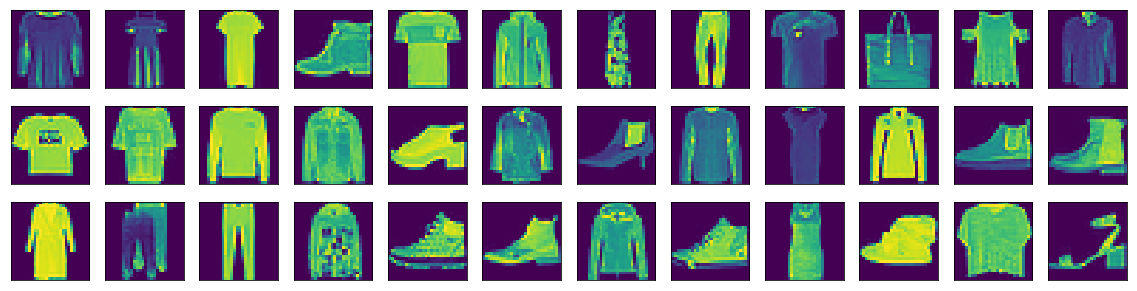

In [8]:
# Plot some images from Dataset
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3,12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i].reshape(28,28)))

## Step-4: Define Training Input and Create Estimator Model

Next, we'll define the training feature columns. Since the feature values are numerical values, we'll create the numerical columns.

In [9]:
# Define Feature Column
feat_cols = [tf.feature_column.numeric_column('x', shape=[28,28])]

In [10]:
# Define Training Input
train_input = tf.estimator.inputs.numpy_input_fn(x={'x':X_train}, y=y_train, num_epochs=None, batch_size=50, shuffle=True)

In [11]:
# DNN Classifier Model
dnn_model = tf.estimator.DNNClassifier(feature_columns=feat_cols, hidden_units=[256, 32], optimizer=tf.train.AdamOptimizer(1e-4), n_classes=10, dropout=0.1, model_dir='./mnist_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_task_type': 'worker', '_global_id_in_cluster': 0, '_master': '', '_is_chief': True, '_save_summary_steps': 100, '_num_worker_replicas': 1, '_keep_checkpoint_max': 5, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4c65b24630>, '_log_step_count_steps': 100, '_tf_random_seed': None, '_task_id': 0, '_model_dir': './mnist_model', '_service': None, '_save_checkpoints_secs': 600, '_evaluation_master': '', '_session_config': None, '_num_ps_replicas': 0, '_keep_checkpoint_every_n_hours': 10000}


In [12]:
# Training the Model
dnn_model.train(input_fn=train_input, steps=100000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mnist_model/model.ckpt-214000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 214001 into ./mnist_model/model.ckpt.
INFO:tensorflow:step = 214000, loss = 4.4047165
INFO:tensorflow:global_step/sec: 361.023
INFO:tensorflow:step = 214100, loss = 2.8470101 (0.278 sec)
INFO:tensorflow:global_step/sec: 466.876
INFO:tensorflow:step = 214200, loss = 4.1019764 (0.214 sec)
INFO:tensorflow:global_step/sec: 470.862
INFO:tensorflow:step = 214300, loss = 1.0564506 (0.212 sec)
INFO:tensorflow:global_step/sec: 470.079
INFO:tensorflow:step = 214400, loss = 0.420212 (0.213 sec)
INFO:tensorflow:global_step/sec: 469.099
INFO:tensorflow:step = 214500, loss = 0.9618665 (0.213 sec)
INFO:tensorflow:global_step/sec: 471.336
INFO:tensorflow:ste

INFO:tensorflow:global_step/sec: 468.536
INFO:tensorflow:step = 221800, loss = 0.37796295 (0.213 sec)
INFO:tensorflow:global_step/sec: 467.573
INFO:tensorflow:step = 221900, loss = 0.7926991 (0.214 sec)
INFO:tensorflow:global_step/sec: 471.816
INFO:tensorflow:step = 222000, loss = 0.7450031 (0.212 sec)
INFO:tensorflow:global_step/sec: 476.126
INFO:tensorflow:step = 222100, loss = 0.28447276 (0.210 sec)
INFO:tensorflow:global_step/sec: 469.893
INFO:tensorflow:step = 222200, loss = 1.2835096 (0.213 sec)
INFO:tensorflow:global_step/sec: 470.459
INFO:tensorflow:step = 222300, loss = 0.98994064 (0.212 sec)
INFO:tensorflow:global_step/sec: 455.134
INFO:tensorflow:step = 222400, loss = 0.04653387 (0.220 sec)
INFO:tensorflow:global_step/sec: 468.821
INFO:tensorflow:step = 222500, loss = 0.608537 (0.213 sec)
INFO:tensorflow:global_step/sec: 468.262
INFO:tensorflow:step = 222600, loss = 0.91573536 (0.213 sec)
INFO:tensorflow:global_step/sec: 467.13
INFO:tensorflow:step = 222700, loss = 0.6399032

INFO:tensorflow:global_step/sec: 470.19
INFO:tensorflow:step = 229900, loss = 0.3253654 (0.212 sec)
INFO:tensorflow:global_step/sec: 460.164
INFO:tensorflow:step = 230000, loss = 3.256432 (0.218 sec)
INFO:tensorflow:global_step/sec: 475.563
INFO:tensorflow:step = 230100, loss = 0.54738677 (0.210 sec)
INFO:tensorflow:global_step/sec: 468.035
INFO:tensorflow:step = 230200, loss = 2.8638897 (0.214 sec)
INFO:tensorflow:global_step/sec: 469.544
INFO:tensorflow:step = 230300, loss = 0.49210554 (0.213 sec)
INFO:tensorflow:global_step/sec: 475.568
INFO:tensorflow:step = 230400, loss = 1.6774603 (0.210 sec)
INFO:tensorflow:global_step/sec: 471.041
INFO:tensorflow:step = 230500, loss = 0.2823835 (0.213 sec)
INFO:tensorflow:global_step/sec: 467.294
INFO:tensorflow:step = 230600, loss = 0.7200226 (0.214 sec)
INFO:tensorflow:global_step/sec: 471.003
INFO:tensorflow:step = 230700, loss = 2.162878 (0.213 sec)
INFO:tensorflow:global_step/sec: 466.356
INFO:tensorflow:step = 230800, loss = 0.33799922 (0

INFO:tensorflow:global_step/sec: 478.784
INFO:tensorflow:step = 238000, loss = 3.6949272 (0.209 sec)
INFO:tensorflow:global_step/sec: 477.641
INFO:tensorflow:step = 238100, loss = 2.465623 (0.209 sec)
INFO:tensorflow:global_step/sec: 483.475
INFO:tensorflow:step = 238200, loss = 0.24580568 (0.207 sec)
INFO:tensorflow:global_step/sec: 477.437
INFO:tensorflow:step = 238300, loss = 0.8516282 (0.210 sec)
INFO:tensorflow:global_step/sec: 477.86
INFO:tensorflow:step = 238400, loss = 0.26573864 (0.210 sec)
INFO:tensorflow:global_step/sec: 480.524
INFO:tensorflow:step = 238500, loss = 0.3126948 (0.208 sec)
INFO:tensorflow:global_step/sec: 467.223
INFO:tensorflow:step = 238600, loss = 0.8899884 (0.214 sec)
INFO:tensorflow:global_step/sec: 475.119
INFO:tensorflow:step = 238700, loss = 0.25815403 (0.210 sec)
INFO:tensorflow:global_step/sec: 471.166
INFO:tensorflow:step = 238800, loss = 1.1169372 (0.212 sec)
INFO:tensorflow:global_step/sec: 459.084
INFO:tensorflow:step = 238900, loss = 1.8862324 (

INFO:tensorflow:global_step/sec: 465.954
INFO:tensorflow:step = 246100, loss = 2.1979764 (0.215 sec)
INFO:tensorflow:global_step/sec: 460.478
INFO:tensorflow:step = 246200, loss = 4.535287 (0.217 sec)
INFO:tensorflow:global_step/sec: 460.55
INFO:tensorflow:step = 246300, loss = 0.93364966 (0.217 sec)
INFO:tensorflow:global_step/sec: 460.303
INFO:tensorflow:step = 246400, loss = 1.1112924 (0.217 sec)
INFO:tensorflow:global_step/sec: 461.26
INFO:tensorflow:step = 246500, loss = 0.30066428 (0.217 sec)
INFO:tensorflow:global_step/sec: 466.838
INFO:tensorflow:step = 246600, loss = 4.576683 (0.214 sec)
INFO:tensorflow:global_step/sec: 457.951
INFO:tensorflow:step = 246700, loss = 0.5156861 (0.219 sec)
INFO:tensorflow:global_step/sec: 459.756
INFO:tensorflow:step = 246800, loss = 0.27368653 (0.217 sec)
INFO:tensorflow:global_step/sec: 457.014
INFO:tensorflow:step = 246900, loss = 4.6331964 (0.219 sec)
INFO:tensorflow:global_step/sec: 457.268
INFO:tensorflow:step = 247000, loss = 0.53216815 (0

INFO:tensorflow:global_step/sec: 439.336
INFO:tensorflow:step = 254200, loss = 1.2323366 (0.228 sec)
INFO:tensorflow:global_step/sec: 445.919
INFO:tensorflow:step = 254300, loss = 1.5933855 (0.224 sec)
INFO:tensorflow:global_step/sec: 454.089
INFO:tensorflow:step = 254400, loss = 1.7306885 (0.220 sec)
INFO:tensorflow:global_step/sec: 453.623
INFO:tensorflow:step = 254500, loss = 0.020230714 (0.220 sec)
INFO:tensorflow:global_step/sec: 455.676
INFO:tensorflow:step = 254600, loss = 3.6723652 (0.220 sec)
INFO:tensorflow:global_step/sec: 456.871
INFO:tensorflow:step = 254700, loss = 3.3225489 (0.219 sec)
INFO:tensorflow:global_step/sec: 452.71
INFO:tensorflow:step = 254800, loss = 0.15858093 (0.221 sec)
INFO:tensorflow:global_step/sec: 454.015
INFO:tensorflow:step = 254900, loss = 0.24682271 (0.220 sec)
INFO:tensorflow:global_step/sec: 453.932
INFO:tensorflow:step = 255000, loss = 0.7000899 (0.220 sec)
INFO:tensorflow:global_step/sec: 458.284
INFO:tensorflow:step = 255100, loss = 0.1831062

INFO:tensorflow:global_step/sec: 462.545
INFO:tensorflow:step = 262300, loss = 0.6399909 (0.216 sec)
INFO:tensorflow:global_step/sec: 471.513
INFO:tensorflow:step = 262400, loss = 1.1860476 (0.212 sec)
INFO:tensorflow:global_step/sec: 461.349
INFO:tensorflow:step = 262500, loss = 0.72913873 (0.217 sec)
INFO:tensorflow:global_step/sec: 458.94
INFO:tensorflow:step = 262600, loss = 0.10025199 (0.218 sec)
INFO:tensorflow:global_step/sec: 463.183
INFO:tensorflow:step = 262700, loss = 1.3801582 (0.216 sec)
INFO:tensorflow:global_step/sec: 469.97
INFO:tensorflow:step = 262800, loss = 0.12263126 (0.213 sec)
INFO:tensorflow:global_step/sec: 468.648
INFO:tensorflow:step = 262900, loss = 4.035146 (0.214 sec)
INFO:tensorflow:global_step/sec: 456.743
INFO:tensorflow:step = 263000, loss = 0.30159009 (0.219 sec)
INFO:tensorflow:global_step/sec: 456.966
INFO:tensorflow:step = 263100, loss = 0.48766902 (0.220 sec)
INFO:tensorflow:global_step/sec: 455.952
INFO:tensorflow:step = 263200, loss = 0.6503994 

INFO:tensorflow:global_step/sec: 460.217
INFO:tensorflow:step = 270400, loss = 1.0084732 (0.217 sec)
INFO:tensorflow:global_step/sec: 459.904
INFO:tensorflow:step = 270500, loss = 1.0318731 (0.218 sec)
INFO:tensorflow:global_step/sec: 463.056
INFO:tensorflow:step = 270600, loss = 1.3568155 (0.216 sec)
INFO:tensorflow:global_step/sec: 478.724
INFO:tensorflow:step = 270700, loss = 0.76607805 (0.209 sec)
INFO:tensorflow:global_step/sec: 469.245
INFO:tensorflow:step = 270800, loss = 0.27208716 (0.213 sec)
INFO:tensorflow:global_step/sec: 471.273
INFO:tensorflow:step = 270900, loss = 0.13203846 (0.212 sec)
INFO:tensorflow:global_step/sec: 460.296
INFO:tensorflow:step = 271000, loss = 0.56258816 (0.217 sec)
INFO:tensorflow:global_step/sec: 467.56
INFO:tensorflow:step = 271100, loss = 3.2982163 (0.214 sec)
INFO:tensorflow:global_step/sec: 472.336
INFO:tensorflow:step = 271200, loss = 1.038218 (0.212 sec)
INFO:tensorflow:global_step/sec: 470.232
INFO:tensorflow:step = 271300, loss = 0.16942139

INFO:tensorflow:global_step/sec: 498.033
INFO:tensorflow:step = 278500, loss = 1.0909734 (0.201 sec)
INFO:tensorflow:global_step/sec: 477.17
INFO:tensorflow:step = 278600, loss = 1.9693666 (0.210 sec)
INFO:tensorflow:global_step/sec: 487.655
INFO:tensorflow:step = 278700, loss = 0.56093234 (0.205 sec)
INFO:tensorflow:global_step/sec: 479.81
INFO:tensorflow:step = 278800, loss = 0.3494661 (0.208 sec)
INFO:tensorflow:global_step/sec: 476.66
INFO:tensorflow:step = 278900, loss = 0.098697364 (0.211 sec)
INFO:tensorflow:global_step/sec: 489.888
INFO:tensorflow:step = 279000, loss = 2.572043 (0.203 sec)
INFO:tensorflow:global_step/sec: 491.361
INFO:tensorflow:step = 279100, loss = 0.7181123 (0.204 sec)
INFO:tensorflow:global_step/sec: 475.307
INFO:tensorflow:step = 279200, loss = 1.446013 (0.211 sec)
INFO:tensorflow:global_step/sec: 473.429
INFO:tensorflow:step = 279300, loss = 1.9392552 (0.211 sec)
INFO:tensorflow:global_step/sec: 490.331
INFO:tensorflow:step = 279400, loss = 0.3797472 (0.2

INFO:tensorflow:step = 286600, loss = 2.3740373 (0.207 sec)
INFO:tensorflow:global_step/sec: 478.181
INFO:tensorflow:step = 286700, loss = 0.71887636 (0.209 sec)
INFO:tensorflow:global_step/sec: 488.365
INFO:tensorflow:step = 286800, loss = 0.14689954 (0.205 sec)
INFO:tensorflow:global_step/sec: 479.61
INFO:tensorflow:step = 286900, loss = 1.1905601 (0.209 sec)
INFO:tensorflow:global_step/sec: 474.779
INFO:tensorflow:step = 287000, loss = 0.9119834 (0.211 sec)
INFO:tensorflow:global_step/sec: 477.514
INFO:tensorflow:step = 287100, loss = 0.13571689 (0.209 sec)
INFO:tensorflow:global_step/sec: 493.313
INFO:tensorflow:step = 287200, loss = 0.74413097 (0.203 sec)
INFO:tensorflow:global_step/sec: 483.668
INFO:tensorflow:step = 287300, loss = 0.42744923 (0.207 sec)
INFO:tensorflow:global_step/sec: 481.539
INFO:tensorflow:step = 287400, loss = 1.0885969 (0.208 sec)
INFO:tensorflow:global_step/sec: 485.824
INFO:tensorflow:step = 287500, loss = 1.5964181 (0.206 sec)
INFO:tensorflow:global_step

INFO:tensorflow:step = 294700, loss = 0.05304179 (0.218 sec)
INFO:tensorflow:global_step/sec: 458.142
INFO:tensorflow:step = 294800, loss = 3.5842419 (0.218 sec)
INFO:tensorflow:global_step/sec: 469.75
INFO:tensorflow:step = 294900, loss = 0.25648966 (0.213 sec)
INFO:tensorflow:global_step/sec: 472.601
INFO:tensorflow:step = 295000, loss = 0.69022804 (0.211 sec)
INFO:tensorflow:global_step/sec: 466.367
INFO:tensorflow:step = 295100, loss = 2.6477053 (0.214 sec)
INFO:tensorflow:global_step/sec: 470.676
INFO:tensorflow:step = 295200, loss = 0.014228305 (0.212 sec)
INFO:tensorflow:global_step/sec: 464.919
INFO:tensorflow:step = 295300, loss = 0.187181 (0.215 sec)
INFO:tensorflow:global_step/sec: 456.021
INFO:tensorflow:step = 295400, loss = 1.851346 (0.219 sec)
INFO:tensorflow:global_step/sec: 455.338
INFO:tensorflow:step = 295500, loss = 0.30237854 (0.220 sec)
INFO:tensorflow:global_step/sec: 458.808
INFO:tensorflow:step = 295600, loss = 1.6027024 (0.218 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:step = 302800, loss = 2.466474 (0.222 sec)
INFO:tensorflow:global_step/sec: 452.389
INFO:tensorflow:step = 302900, loss = 0.013394915 (0.219 sec)
INFO:tensorflow:global_step/sec: 460.068
INFO:tensorflow:step = 303000, loss = 0.11149244 (0.217 sec)
INFO:tensorflow:global_step/sec: 462.617
INFO:tensorflow:step = 303100, loss = 1.5145017 (0.216 sec)
INFO:tensorflow:global_step/sec: 449.439
INFO:tensorflow:step = 303200, loss = 1.4959098 (0.223 sec)
INFO:tensorflow:global_step/sec: 457.271
INFO:tensorflow:step = 303300, loss = 0.22332565 (0.219 sec)
INFO:tensorflow:global_step/sec: 446.71
INFO:tensorflow:step = 303400, loss = 1.7314788 (0.224 sec)
INFO:tensorflow:global_step/sec: 461.159
INFO:tensorflow:step = 303500, loss = 3.6799748 (0.216 sec)
INFO:tensorflow:global_step/sec: 457.328
INFO:tensorflow:step = 303600, loss = 1.3133262 (0.219 sec)
INFO:tensorflow:global_step/sec: 459.048
INFO:tensorflow:step = 303700, loss = 0.16458884 (0.218 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:step = 310900, loss = 0.11320391 (0.214 sec)
INFO:tensorflow:global_step/sec: 461.448
INFO:tensorflow:step = 311000, loss = 0.19821554 (0.216 sec)
INFO:tensorflow:global_step/sec: 463.354
INFO:tensorflow:step = 311100, loss = 1.5364566 (0.216 sec)
INFO:tensorflow:global_step/sec: 461.164
INFO:tensorflow:step = 311200, loss = 6.606591 (0.217 sec)
INFO:tensorflow:global_step/sec: 466.714
INFO:tensorflow:step = 311300, loss = 0.2159519 (0.214 sec)
INFO:tensorflow:global_step/sec: 464.599
INFO:tensorflow:step = 311400, loss = 0.5377669 (0.216 sec)
INFO:tensorflow:global_step/sec: 460.486
INFO:tensorflow:step = 311500, loss = 0.37682015 (0.218 sec)
INFO:tensorflow:global_step/sec: 465.254
INFO:tensorflow:step = 311600, loss = 0.11825697 (0.214 sec)
INFO:tensorflow:global_step/sec: 463.577
INFO:tensorflow:step = 311700, loss = 1.4722342 (0.215 sec)
INFO:tensorflow:global_step/sec: 465.687
INFO:tensorflow:step = 311800, loss = 1.7159263 (0.215 sec)
INFO:tensorflow:global_step/

## Step-5: Validating the Trained Model

In [13]:
# Validation/Evaluation Input
eval_input = tf.estimator.inputs.numpy_input_fn(x={'x':X_val}, y=y_val, num_epochs=1000, batch_size=20, shuffle=False)

In [14]:
# Validate the Model Performance
dnn_model.evaluate(input_fn=eval_input)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-09-13:12:50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mnist_model/model.ckpt-314000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-09-13:30:30
INFO:tensorflow:Saving dict for global step 314000: accuracy = 0.8940909, average_loss = 0.71235186, global_step = 314000, loss = 14.247037


{'accuracy': 0.8940909,
 'average_loss': 0.71235186,
 'global_step': 314000,
 'loss': 14.247037}

## Step-6: Test Model Performance on Test Data

In [15]:
# Test Input
test_input = tf.estimator.inputs.numpy_input_fn(x={'x':X_test}, y=y_test, num_epochs=1, batch_size=10, shuffle=False)

In [16]:
# Predict Labels for Test Data
y_pred = dnn_model.predict(input_fn=test_input)

In [17]:
# List of Predictions
predicted_labels = list(y_pred)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mnist_model/model.ckpt-314000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [18]:
predicted_labels

[{'class_ids': array([9]),
  'classes': array([b'9'], dtype=object),
  'logits': array([-26.624592 , -19.360931 , -18.109446 , -19.622164 , -18.231052 ,
          -3.7047343, -35.45777  ,  -3.3021495, -14.17699  ,  15.240501 ],
        dtype=float32),
  'probabilities': array([6.5799261e-19, 9.3926615e-16, 3.2832418e-15, 7.2333204e-16,
         2.9072934e-15, 5.9181837e-09, 9.5944463e-23, 8.8517540e-09,
         1.6755045e-13, 1.0000000e+00], dtype=float32)},
 {'class_ids': array([2]),
  'classes': array([b'2'], dtype=object),
  'logits': array([ -6.683204, -19.03279 ,  17.00539 , -30.744827, -11.657295,
         -30.23733 , -23.731298, -34.82696 , -18.80138 , -25.266024],
        dtype=float32),
  'probabilities': array([5.1543506e-11, 2.2326383e-16, 1.0000000e+00, 1.8295490e-21,
         3.5641330e-13, 3.0391119e-21, 2.0336759e-18, 3.0867089e-23,
         2.8139554e-16, 4.3828578e-19], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logits': a

In [19]:
for preds in predicted_labels:
    print(preds['probabilities'])

[6.5799261e-19 9.3926615e-16 3.2832418e-15 7.2333204e-16 2.9072934e-15
 5.9181837e-09 9.5944463e-23 8.8517540e-09 1.6755045e-13 1.0000000e+00]
[5.1543506e-11 2.2326383e-16 1.0000000e+00 1.8295490e-21 3.5641330e-13
 3.0391119e-21 2.0336759e-18 3.0867089e-23 2.8139554e-16 4.3828578e-19]
[1.4113132e-30 1.0000000e+00 0.0000000e+00 2.3416224e-25 7.3461563e-18
 5.3061644e-37 6.4898354e-34 0.0000000e+00 1.7147507e-24 0.0000000e+00]
[7.7644998e-27 1.0000000e+00 6.4066882e-36 3.5009522e-18 4.0417137e-20
 2.0684805e-30 1.0640327e-28 6.1805547e-36 2.5675360e-24 1.7754933e-36]
[1.93841502e-01 1.10741935e-14 2.08513498e-10 2.51861043e-09
 4.58673864e-14 1.66348819e-08 8.06158483e-01 2.48897402e-16
 1.41385501e-10 1.20993188e-10]
[2.2814544e-24 1.0000000e+00 5.4563476e-33 8.2118738e-19 3.0937784e-14
 8.7355204e-28 9.0404708e-27 4.3318025e-31 2.0763106e-19 2.6518280e-32]
[3.2137720e-24 3.3831887e-15 1.0688067e-09 1.1138556e-20 1.0000000e+00
 2.8778258e-27 1.5115110e-13 6.1242612e-18 6.9317137e-16 1.1

 9.3989572e-10 7.4973816e-01 9.2927332e-10 6.4977299e-05 2.6278060e-12]
[1.82407814e-06 5.46952847e-08 3.40010843e-07 9.95237947e-01
 5.37806216e-07 8.95699834e-11 4.75910772e-03 1.36077754e-08
 1.00942728e-07 1.05371274e-10]
[1.1831023e-08 1.5964199e-08 9.9938786e-01 8.3238236e-11 6.1159435e-04
 5.1069743e-12 5.0548016e-07 2.5322295e-11 4.9072380e-08 7.5248497e-12]
[1.7139711e-18 1.1029993e-24 1.9056846e-28 1.6375428e-18 5.4107725e-24
 4.1045041e-18 1.0756339e-15 9.7808214e-20 1.0000000e+00 5.1264144e-16]
[1.5878652e-06 1.3301366e-08 4.5279901e-08 9.9998450e-01 1.3892659e-05
 8.6428177e-11 4.7571001e-16 3.3962868e-15 5.7387255e-09 6.5500272e-14]
[9.4394981e-09 4.7099884e-13 5.5446694e-06 2.2625407e-11 1.3146209e-07
 7.0901696e-12 9.9999428e-01 1.5754234e-13 1.6752746e-09 6.9630066e-14]
[2.7937788e-34 1.0000000e+00 0.0000000e+00 4.9480684e-26 1.3577986e-18
 1.1519733e-36 7.5670304e-36 0.0000000e+00 1.0384042e-23 0.0000000e+00]
[1.6847598e-20 1.0000000e+00 3.5649333e-29 2.5916252e-16 5.

[1.5701763e-21 8.3432156e-22 1.0611382e-21 9.2904362e-21 7.3780242e-35
 1.0000000e+00 4.6375148e-32 2.2583862e-17 4.9519643e-16 1.6769139e-10]
[4.0135468e-22 2.1617771e-31 6.4990999e-27 1.9176426e-22 1.5207151e-32
 1.0000000e+00 1.0897227e-28 3.5059352e-19 3.5980503e-14 1.6785812e-21]
[3.5870710e-14 1.5677135e-16 2.3205352e-08 1.2064062e-12 6.2558354e-07
 6.4729517e-17 9.9999940e-01 7.5810825e-17 1.1350947e-11 1.2597579e-20]
[7.3587304e-17 6.1866651e-11 6.7810972e-05 5.1494058e-17 9.9993205e-01
 1.3084757e-18 1.3560654e-07 9.8259856e-16 3.9655869e-11 1.2481181e-18]
[2.8734663e-15 4.1657747e-16 1.8609107e-17 2.9121760e-16 6.3335913e-22
 1.0000000e+00 4.6875279e-25 8.1042117e-12 1.3298229e-11 2.9934158e-10]
[1.5105645e-37 1.0011275e-27 2.3967006e-28 4.3084439e-34 5.2322973e-29
 2.7469779e-16 0.0000000e+00 2.0053623e-09 1.1093675e-23 1.0000000e+00]
[3.3975921e-25 7.1382637e-37 4.0860178e-28 1.3562480e-22 0.0000000e+00
 1.0000000e+00 9.6351704e-28 4.7643412e-26 5.1577941e-18 2.7864639e-21]

[2.2502143e-19 1.0000000e+00 1.3785447e-25 3.0122215e-12 7.3278986e-13
 2.5759118e-18 4.8646032e-23 2.7214326e-25 6.1666053e-16 2.6294789e-22]
[1.74551335e-12 8.20249359e-13 9.56149293e-08 1.01227846e-11
 8.94623622e-03 4.65704461e-13 9.91051316e-01 4.04609124e-11
 2.30383876e-06 6.11463754e-17]
[6.0312859e-06 3.5773627e-14 6.7810842e-14 6.5833343e-09 7.0674612e-11
 9.0251209e-11 9.9999392e-01 4.0035995e-14 7.4088014e-10 9.4091913e-12]
[1.3506413e-14 4.6125725e-15 2.1154307e-18 1.0908226e-17 2.6923542e-18
 2.5215025e-10 5.4755788e-23 7.7318533e-16 8.5045764e-18 1.0000000e+00]
[1.1076827e-26 1.8874946e-22 2.6741019e-27 1.0897215e-15 2.2786262e-25
 1.6681970e-19 3.5282756e-18 1.4116896e-23 1.0000000e+00 3.3260105e-17]
[1.9177524e-08 2.2493034e-10 9.9190444e-01 2.5124109e-14 8.0941282e-03
 6.4635120e-16 1.4194409e-06 6.5145860e-14 2.1428450e-09 2.4415953e-14]
[9.5654158e-11 7.0866193e-18 7.6241735e-27 1.3728965e-12 1.8386781e-15
 3.1607032e-16 2.9397229e-12 7.5781788e-14 1.0000000e+00 5.4

[6.4219268e-15 1.3769926e-12 5.4923569e-15 9.9677937e-13 2.0558094e-13
 1.1583721e-07 1.3928282e-16 9.9999988e-01 3.3698852e-10 5.4256194e-10]
[8.3840240e-10 1.0623273e-09 3.0825459e-10 9.9999988e-01 6.8663845e-11
 3.9371562e-11 1.5605882e-07 1.0127042e-12 5.6583502e-09 3.8725203e-13]
[1.8687524e-08 3.8748356e-09 1.1282548e-05 7.1241722e-08 8.1676512e-04
 2.9074589e-09 9.9916160e-01 1.0400141e-08 1.0290027e-05 6.8782866e-12]
[1.0000000e+00 1.2929238e-12 1.0392314e-10 2.4376294e-14 4.6801320e-17
 6.9561330e-17 1.1080373e-08 1.2398286e-23 2.4622716e-16 1.5027812e-16]
[1.5905055e-18 7.2158989e-12 2.4035999e-04 3.9150041e-18 9.9974757e-01
 3.7260267e-20 1.2062309e-05 3.8127323e-18 4.7270451e-11 3.1487533e-22]
[9.9899179e-01 7.4833570e-09 1.7284576e-05 4.2449751e-06 3.5603973e-09
 2.3502938e-05 9.6020702e-04 2.0640800e-10 1.7557746e-06 1.1777432e-06]
[8.9431893e-09 2.9984111e-09 1.6525506e-10 9.9999988e-01 4.0390477e-12
 5.2036320e-11 5.9776433e-08 2.5957104e-13 1.0719624e-10 6.8778787e-15]

[2.5007022e-03 2.7953370e-06 9.9740809e-01 2.5590427e-07 8.4920102e-05
 8.7382986e-08 7.5044170e-08 6.8240197e-08 3.0128995e-06 4.8335675e-08]
[3.2367434e-16 1.2507633e-13 5.6365215e-15 1.0000000e+00 8.1610375e-18
 3.3020431e-16 5.4977241e-15 6.7870210e-23 1.5184272e-15 7.8376704e-21]
[3.0410934e-22 1.3902691e-13 1.9284318e-16 1.1594895e-07 1.2117566e-09
 4.5090021e-09 3.5733453e-15 3.5080761e-11 9.9999988e-01 6.7966684e-20]
[7.1935342e-30 1.6628223e-26 1.9780346e-27 5.2293789e-31 1.4765540e-27
 8.1737139e-19 0.0000000e+00 5.5899702e-15 1.7337967e-27 1.0000000e+00]
[1.6705459e-20 2.4649870e-24 2.4292321e-26 3.0660070e-16 8.0881966e-20
 2.7861655e-14 3.6428211e-16 1.0000000e+00 3.6476659e-13 3.3686869e-23]
[4.9637896e-14 1.0000000e+00 6.7633637e-18 6.3124070e-09 3.3154653e-13
 8.7796672e-17 1.2031592e-17 7.5764497e-20 1.0216583e-15 8.4489448e-21]
[9.3446215e-06 7.3599682e-09 4.7137919e-14 9.9997795e-01 4.0839130e-15
 4.9903061e-11 1.2754630e-05 3.1264945e-15 2.1798764e-13 1.0388938e-13]

[9.5427422e-10 3.1187679e-09 1.3832453e-01 1.0436575e-15 8.6167502e-01
 6.9150955e-16 3.7866809e-07 2.0735556e-14 1.0508475e-09 2.1984998e-13]
[1.7278442e-08 9.4467772e-08 1.6579587e-06 1.3913892e-08 4.7563752e-08
 9.7533053e-01 3.1376794e-12 2.4300931e-02 3.6672405e-05 3.3014940e-04]
[0.0000000e+00 8.1819373e-37 0.0000000e+00 0.0000000e+00 0.0000000e+00
 6.1952843e-21 0.0000000e+00 4.5480438e-24 0.0000000e+00 1.0000000e+00]
[9.9999988e-01 1.8162199e-12 4.6526789e-11 8.4701979e-09 1.2684470e-14
 2.5855107e-10 6.6434822e-08 6.7557701e-14 2.1149467e-10 2.0110108e-10]
[1.9601309e-16 2.7730863e-14 1.6575753e-15 5.0771819e-14 3.0324624e-15
 1.3493735e-08 1.0653296e-18 1.0000000e+00 3.6469529e-11 5.3140159e-10]
[1.8308622e-09 5.6703210e-13 1.0000000e+00 1.2726244e-15 2.5482328e-11
 9.3036235e-15 3.4016935e-08 1.1972935e-18 5.3773246e-13 2.8272640e-17]
[6.5748507e-10 1.6919349e-12 9.9863633e-14 1.0000000e+00 1.1540504e-12
 8.6357491e-15 1.6892666e-14 4.6108567e-19 1.5838807e-13 1.0642898e-18]

[4.7716040e-09 2.0525935e-13 4.1329380e-09 1.9534052e-13 1.6117287e-06
 4.2390576e-13 9.9999833e-01 6.2394581e-14 4.4134393e-10 3.7493556e-17]
[5.4079996e-10 1.3340597e-10 9.9999714e-01 2.5745541e-14 2.8200063e-06
 1.4405022e-14 2.1978919e-09 2.3165640e-15 1.1948312e-10 2.6643455e-15]
[3.1000873e-25 0.0000000e+00 0.0000000e+00 2.3927629e-36 0.0000000e+00
 1.0000000e+00 0.0000000e+00 0.0000000e+00 2.2438102e-35 2.0153752e-23]
[8.4329461e-20 1.0000000e+00 2.1444771e-26 4.4405063e-15 2.1748165e-13
 1.0224735e-22 5.5312993e-22 3.5471736e-23 2.4749550e-17 9.5066621e-27]
[4.1147999e-20 1.0126188e-13 2.7773119e-09 8.9620774e-20 1.0000000e+00
 1.1806323e-22 6.3677885e-10 1.5246193e-16 6.6300611e-13 1.0336824e-21]
[5.4219248e-07 5.4907590e-10 9.3744421e-01 3.3693256e-14 8.4821442e-03
 2.2489473e-13 5.4073099e-02 9.6654867e-13 2.7630780e-09 5.1744262e-11]
[9.2178016e-09 1.1798920e-09 9.9312043e-01 9.2399061e-10 9.6225938e-07
 9.5101420e-11 6.8786778e-03 1.2431458e-11 1.3776876e-09 2.8331977e-11]

[9.24036535e-26 1.04744136e-19 7.19351319e-21 1.43127223e-20
 3.59401995e-20 2.77830791e-13 1.05144489e-26 1.00000000e+00
 4.99814941e-19 3.87437714e-16]
[9.9171692e-01 1.3925729e-06 2.9563967e-06 2.0291251e-03 3.1675306e-08
 1.0520125e-06 6.2455744e-03 7.1239570e-11 8.9529055e-07 2.0829889e-06]
[2.0955756e-13 1.0461610e-11 3.1498680e-12 3.1539201e-12 6.2581123e-15
 6.3766056e-05 1.2554299e-17 9.9993622e-01 3.3486569e-09 6.8847816e-10]
[7.1471006e-12 1.8468002e-08 9.8742364e-14 1.0000000e+00 2.9252556e-18
 3.2997913e-11 1.5652997e-13 7.8849119e-26 1.3010109e-15 3.4892612e-17]
[6.3422398e-08 5.1461313e-07 3.6027320e-10 9.9999940e-01 2.6878377e-10
 4.8850324e-10 1.0759932e-10 3.3920922e-14 2.9858545e-09 7.5187984e-14]
[2.2321715e-12 2.5767860e-12 1.0805351e-05 1.4819163e-11 1.0192031e-02
 2.0243467e-14 9.8979712e-01 5.8319809e-13 1.5486112e-09 1.1725644e-16]
[1.9717896e-19 3.8404428e-17 2.2053555e-17 1.7973829e-20 6.5694957e-18
 3.7985580e-11 1.1675659e-25 8.1325025e-12 1.1890189e-18 1.0

 5.5282970e-07 8.8958608e-05 1.8232188e-10 1.0418711e-01 1.9417529e-04]
[1.7294507e-21 3.1896440e-15 1.6656251e-17 1.2723222e-19 7.6749230e-13
 6.3400809e-13 2.7958199e-25 8.3399197e-04 2.3322918e-17 9.9916601e-01]
[5.1328075e-09 2.8044591e-08 1.1551528e-04 2.1502553e-06 1.3250219e-06
 3.9179998e-10 9.9987125e-01 8.9589561e-13 9.7792781e-06 3.7905749e-13]
[6.9819994e-19 1.2139824e-14 1.5973507e-15 2.2393766e-14 1.5239111e-16
 3.3502733e-05 1.3024637e-20 9.9996650e-01 5.6109712e-09 5.9271525e-11]
[4.5219345e-10 1.6233842e-09 2.5739973e-07 9.9991941e-01 8.0183956e-05
 5.6956151e-10 1.9141508e-08 7.7884652e-12 9.4652982e-08 1.2636631e-10]
[1.5562828e-20 8.6095117e-20 4.0465906e-19 1.3465344e-24 1.8112735e-19
 2.6694770e-14 1.4236802e-29 1.2119774e-11 2.1240077e-20 1.0000000e+00]
[3.7651804e-12 1.0000000e+00 5.8419807e-19 2.7006624e-09 2.8490696e-09
 2.7588460e-15 7.9442830e-15 4.4491541e-15 2.2284042e-13 2.2420338e-17]
[2.6191715e-08 1.0178436e-09 6.1241400e-01 1.2310301e-08 4.4886434e-08

 3.8245324e-34 4.9170689e-37 0.0000000e+00 2.5107597e-23 0.0000000e+00]
[1.7721891e-02 8.3612740e-01 1.4502330e-01 4.5868586e-05 1.2332344e-04
 1.0408477e-05 1.0578820e-07 9.2828245e-04 1.9124374e-05 3.0188923e-07]
[4.5296320e-27 1.7887567e-21 2.7464030e-30 4.2035209e-19 5.2558962e-24
 1.5248539e-21 1.3907265e-30 2.1263351e-27 1.0000000e+00 9.8407533e-17]
[2.3178700e-13 1.7924483e-08 1.7004762e-06 2.3758906e-08 9.9910671e-01
 5.9097599e-10 1.8060160e-06 9.1650948e-10 8.8972278e-04 1.9319368e-14]
[8.9299960e-28 1.0000000e+00 1.5051870e-36 9.8052911e-20 1.9956225e-15
 1.1305811e-27 4.0817899e-31 1.1956687e-33 1.3664591e-20 2.7379780e-33]
[3.3036020e-18 4.4197940e-12 5.3002318e-09 1.3058482e-16 1.0000000e+00
 5.0100204e-20 2.5135278e-09 3.3837777e-14 1.3204610e-11 1.4966127e-18]
[7.4143096e-12 2.5665741e-18 6.4697627e-12 1.4389237e-15 4.2247439e-10
 2.4409011e-17 1.0000000e+00 1.3527991e-18 1.4695293e-13 1.3526474e-21]
[0.0000000e+00 1.2680624e-33 7.6929318e-38 0.0000000e+00 0.0000000e+00

 9.93444723e-24 1.00000000e+00]
[7.1832606e-13 3.6797607e-10 4.8430273e-04 1.1562779e-16 9.9937099e-01
 2.5037093e-17 1.4469340e-04 1.2566861e-14 6.7324774e-10 4.6554181e-17]
[0.0000000e+00 4.8891680e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00
 2.4798914e-22 0.0000000e+00 5.4763153e-21 3.3085879e-38 1.0000000e+00]
[6.8524147e-10 1.8248436e-10 4.1298361e-11 8.5895763e-10 1.1963184e-11
 8.3822411e-12 1.7757383e-12 8.5470598e-12 9.9998462e-01 1.5413718e-05]
[5.0638636e-18 3.0413115e-16 7.2441988e-24 1.5289023e-13 2.5154867e-15
 7.2052341e-15 2.0740723e-17 7.0902704e-18 1.0000000e+00 2.3247582e-16]
[3.2929812e-19 2.0180431e-17 7.6310217e-17 8.6299537e-15 1.9708763e-15
 2.5987377e-09 6.9368917e-18 1.0000000e+00 1.6815755e-12 2.5365740e-12]
[6.4290837e-11 5.8450507e-09 1.0581456e-08 3.3012365e-12 9.9968123e-01
 2.2539715e-12 3.1878756e-04 1.9823616e-09 3.8319495e-08 3.6550540e-13]
[1.0734646e-12 5.0765810e-13 9.9828231e-01 5.0329274e-16 1.2909192e-05
 1.2329204e-16 1.7047548e-03 1.9375410e

[2.8250841e-26 1.0000000e+00 7.6189755e-33 1.4394053e-17 5.5864713e-16
 4.3339933e-27 2.2170593e-28 1.2704100e-34 1.7605352e-20 3.2937741e-33]
[3.3942925e-08 2.3532453e-07 9.9907362e-01 2.5755334e-11 9.2611939e-04
 4.1649042e-11 4.1966137e-09 4.7192181e-12 1.0435985e-08 1.3299474e-11]
[1.0000000e+00 8.4208893e-13 2.7039223e-11 2.7642610e-11 1.3468358e-19
 6.1247090e-13 3.2249122e-08 3.6301883e-21 1.9758662e-16 1.3870476e-14]
[5.6403902e-08 2.4211115e-09 7.8597448e-11 1.1079343e-05 9.9998832e-01
 1.1517653e-12 3.6197930e-11 1.0331148e-09 6.2483736e-07 1.6648467e-11]
[2.9621695e-23 4.2183455e-20 6.4841837e-22 2.6408233e-18 1.5734396e-19
 1.1282498e-09 7.0993419e-24 1.0000000e+00 2.9824179e-13 1.2674695e-15]
[1.80842534e-14 1.05965486e-10 1.39348884e-03 4.84633384e-13
 9.98596370e-01 2.67694323e-15 1.00868592e-05 8.79392425e-13
 1.17966064e-08 8.23050798e-16]
[1.2299602e-04 1.4055349e-04 5.4294833e-06 9.9972934e-01 1.5680672e-07
 1.1312987e-06 4.1410502e-07 2.0200416e-10 2.3100664e-08 1.4

 5.12860657e-23 5.30496495e-24]
[9.0663887e-16 5.7436341e-16 4.6334807e-18 3.6106431e-15 1.6367282e-14
 1.4162270e-10 9.0540457e-17 1.0000000e+00 3.2849255e-12 9.4690163e-13]
[9.9999309e-01 9.4034852e-18 5.8939846e-11 7.8025848e-16 3.4098065e-21
 2.0836442e-11 6.9389303e-06 3.4572953e-23 8.4995887e-14 6.3861194e-11]
[6.1938242e-27 2.1173154e-22 4.3565452e-23 7.4679943e-25 5.3624542e-20
 6.1837479e-18 9.6585133e-33 3.5681565e-11 1.8679676e-23 1.0000000e+00]
[3.1794589e-16 1.8217342e-22 3.6356039e-15 1.4939662e-14 3.0287533e-14
 3.8211096e-17 1.0000000e+00 2.1689063e-23 2.2984519e-14 1.8137995e-24]
[8.3000400e-22 1.9923374e-21 3.0339554e-29 2.1957426e-25 8.9934143e-34
 3.1122391e-07 1.0556762e-34 1.6517456e-26 6.6269178e-22 9.9999964e-01]
[5.5540513e-11 6.8864975e-10 4.7948107e-01 2.9229189e-11 5.2034825e-01
 3.3669519e-13 1.7072285e-04 1.8013972e-11 1.6837523e-08 2.8046027e-11]
[1.38918113e-26 6.25229796e-33 3.18864455e-29 1.18909142e-33
 6.01709769e-38 1.12325726e-17 0.00000000e+00 3.0

In [20]:
final_preds = []

for preds in predicted_labels:
    max_val = max(preds['probabilities'])
    label_val = np.where(preds['probabilities'] == max_val)
    print(label_val[0][0])
    final_preds.append(label_val[0][0])

9
2
1
1
6
1
4
6
5
7
4
5
5
3
4
1
2
2
8
0
2
5
7
5
1
4
6
0
9
3
8
8
3
3
8
0
7
5
7
9
0
1
6
7
6
7
2
1
2
6
4
2
5
8
2
2
8
4
8
0
7
7
8
5
1
1
2
4
7
8
7
0
2
6
2
3
1
2
8
4
1
8
5
9
5
0
3
2
0
2
5
3
6
7
1
8
0
1
4
2
3
6
7
2
7
8
5
5
9
4
2
5
7
0
5
2
8
6
7
8
0
0
9
9
3
0
8
2
1
5
4
1
9
1
8
6
2
1
2
5
1
0
0
0
1
6
1
3
2
2
3
4
1
3
5
0
4
7
9
3
7
2
3
9
0
9
2
7
4
2
0
5
2
1
2
1
3
0
9
1
0
9
3
6
7
9
9
4
4
7
1
2
3
6
3
2
8
3
6
1
1
0
2
9
2
4
0
7
9
8
4
1
8
4
1
3
1
6
7
2
8
5
2
0
7
7
6
2
7
0
7
8
9
2
9
0
5
1
4
4
5
4
9
2
2
8
6
4
2
2
9
7
6
5
5
4
8
5
2
3
0
4
8
0
0
6
3
8
9
0
1
6
0
2
3
0
8
3
7
4
0
1
2
4
0
6
6
7
5
4
5
9
5
6
5
5
1
9
8
8
3
3
6
8
0
0
2
9
7
9
1
3
6
4
2
4
7
1
6
4
8
2
6
5
6
2
7
7
7
3
3
7
0
7
1
3
7
2
2
3
4
0
3
1
6
1
9
4
9
9
1
7
8
3
6
0
2
4
8
8
1
4
2
4
4
7
3
2
4
5
0
7
9
4
6
9
3
9
8
2
5
6
0
3
5
8
1
6
2
6
6
4
9
5
2
0
6
6
1
2
0
9
7
0
4
4
2
6
2
1
0
6
7
0
9
4
2
1
5
4
5
3
8
5
8
4
4
8
9
8
6
2
4
4
2
4
1
6
1
3
0
7
8
8
4
5
3
1
9
5
3
3
0
1
6
2
9
4
0
6
0
6
2
0
0
3
3
8
2
8
9
4
0
7
0
4
4
9
2
9
5
9
3
7
5
7
8
1
0
0
3
4
8
9
7
9
1
2
7
0


5
1
0
2
9
6
4
9
9
1
4
3
1
2
8
6
3
3
6
2
0
2
3
8
5
2
3
2
0
8
5
4
0
1
0
2
2
6
7
9
6
2
3
3
6
8
5
4
4
0
3
3
5
2
5
1
5
5
1
7
5
2
1
8
8
0
9
0
1
6
3
2
1
8
3
4
2
1
2
0
3
0
8
5
1
5
0
2
6
3
9
8
3
8
1
0
2
6
2
6
3
7
5
0
6
2
0
8
2
2
1
8
2
8
2
9
2
6
8
5
2
7
3
2
2
6
0
6
8
5
2
1
5
2
8
2
9
0
6
3
6
4
6
7
7
9
0
2
9
8
0
5
8
7
7
0
7
7
0
7
7
2
9
7
4
2
2
4
8
0
1
9
8
0
0
2
8
3
8
0
7
6
3
3
8
1
3
8
7
3
0
3
4
8
8
9
1
3
2
1
4
8
0
4
2
7
3
9
4
9
0
4
6
5
7
0
8
1
7
5
4
9
5
7
3
2
0
9
8
7
3
7
7
4
7
5
8
5
4
4
6
2
3
8
9
7
1
3
4
2
9
7
1
2
2
6
6
5
5
4
5
2
8
7
4
9
9
1
4
8
1
5
5
5
6
8
1
5
5
7
7
9
8
3
1
1
4
6
6
9
3
0
4
4
8
6
5
6
9
0
2
8
4
8
6
3
6
1
2
3
3
8
4
9
9
0
7
9
5
3
1
5
2
8
4
9
0
1
6
0
5
8
1
9
3
6
8
3
8
4
2
5
6
9
6
1
2
0
7
9
0
1
3
9
5
1
4
1
1
3
8
3
9
5
4
4
3
7
7
7
6
3
9
1
9
4
4
0
7
6
8
7
5
0
6
4
9
0
4
0
2
7
9
6
1
1
2
0
8
8
7
6
2
7
5
7
6
1
8
1
4
9
8
9
6
1
0
6
0
3
0
6
4
1
9
7
1
2
2
5
3
4
1
7
4
7
6
2
8
8
1
4
9
7
2
3
4
9
3
9
8
5
3
8
4
7
1
4
1
9
6
8
3
2
4
8
1
1
5
8
6
1
6
2
5
0
9
5
3
5
0
6
5
4
8
3
8
0
2
9
5
1
5
3
2
6
5
3
0
3


5
0
5
6
9
1
1
2
0
8
9
7
7
5
8
6
1
4
0
1
8
4
3
4
7
9
3
7
5
5
0
9
1
4
1
2
7
8
0
9
3
3
1
1
7
8
1
6
5
9
0
0
9
5
3
8
8
2
8
5
7
0
7
0
9
6
9
4
9
4
8
5
6
0
1
6
6
0
7
4
1
7
7
8
5
7
0
6
2
2
1
2
8
0
6
2
7
5
9
1
0
4
3
7
0
6
3
1
8
4
7
2
5
9
3
1
5
1
9
2
9
6
2
2
1
8
3
9
8
4
0
4
8
4
5
1
2
4
6
4
1
8
5
7
7
7
3
5
5
7
9
9
8
2
8
2
1
3
3
4
8
9
4
0
7
0
6
8
1
0
6
1
6
5
2
9
9
2
8
7
3
7
2
1
2
1
7
4
8
8
5
0
2
3
6
1
2
6
5
0
1
5
5
2
5
1
9
8
7
1
2
7
0
9
0
1
9
0
4
2
6
5
9
9
4
2
7
1
8
1
4
2
3
7
8
4
6
2
5
4
2
9
3
5
8
0
1
9
6
7
3
7
4
4
6
6
2
1
3
3
6
7
0
5
9
8
9
3
7
9
9
2
8
8
0
1
4
4
0
2
8
1
2
1
3
3
2
7
8
7
0
4
3
6
4
5
7
9
4
5
2
4
5
0
1
7
6
7
6
0
0
0
5
1
1
2
4
6
9
8
1
0
1
6
8
5
4
0
4
0
4
9
3
8
5
2
8
6
2
8
3
4
4
0
8
7
5
2
8
9
2
9
5
9
2
1
0
4
1
7
7
1
7
3
5
8
7
2
5
1
5
2
0
6
0
1
2
4
4
8
0
3
2
4
3
5
1
3
3
0
5
1
8
3
1
8
7
8
4
2
0
3
7
8
1
3
9
0
2
8
1
4
8
8
3
0
8
5
7
5
4
7
7
6
1
8
1
7
7
0
3
1
6
5
5
3
8
9
4
0
9
5
1
7
2
1
5
2
8
3
3
8
7
1
3
4
4
7
7
0
6
7
3
3
7
8
8
2
9
6
9
7
1
2
9
3
6
5
5
6
9
1
4
4
5
6
4
1
4
0
3
3
6
3
0
8
4
7
5
5


In [21]:
# Final Predicted Labels as Numpy Array
final_preds = np.array(final_preds).astype(np.int32)

In [22]:
# Predicted Labels
final_preds

array([9, 2, 1, ..., 8, 1, 5], dtype=int32)

In [23]:
# Test Labels
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=int32)

## Step-7: Get Model Performance Metrics

In [24]:
# Import Dependencies for Model Performance
from sklearn.metrics import mean_squared_error, classification_report

In [25]:
# Root Mean Squared Error
mean_squared_error(y_test,final_preds)**0.5

1.2236829654775783

In [26]:
# Classification Report for the Model
print('Classification Report: \n',classification_report(y_test, final_preds))

Classification Report: 
              precision    recall  f1-score   support

          0       0.83      0.85      0.84      1000
          1       0.98      0.97      0.98      1000
          2       0.79      0.83      0.81      1000
          3       0.89      0.91      0.90      1000
          4       0.82      0.83      0.83      1000
          5       0.96      0.97      0.97      1000
          6       0.76      0.68      0.72      1000
          7       0.94      0.96      0.95      1000
          8       0.96      0.98      0.97      1000
          9       0.97      0.95      0.96      1000

avg / total       0.89      0.89      0.89     10000



In [27]:
# Fashion MNIST labels
fashion_mnist_labels = {0:'T-shirt/Top' , 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat' , 5:'Sandal', 6:'Shirt', 7: 'Sneaker', 8: 'Bag' ,9: 'Ankle Boot'}

In [28]:
X_test.shape

(10000, 784)

## Step-8: Plot Predicted Labels with Test Labels

In [29]:
# Select N random samples from Test Data to Plot
n = np.random.randint(0, X_test.shape[0], 32)

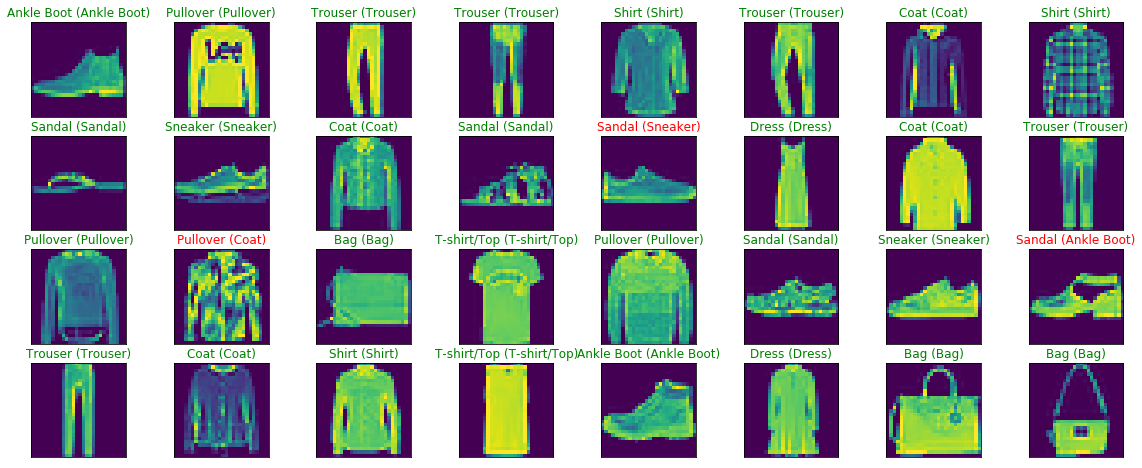

In [30]:
# Plot Final Predictions with Test Labels
fig = plt.figure(figsize=(20,8))

for i in range(len(n)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[i].reshape(28,28)))
    pred_idx = final_preds[i]
    true_idx = y_test[i]
    ax.set_title("{} ({})".format(fashion_mnist_labels[pred_idx], fashion_mnist_labels[true_idx]), color=("green" if pred_idx == true_idx else "red"))